# CARTE DU TAUX D'INSTRUALISATION EN FRANCE AVEC GEOPANDAS #

## IMPORT LIBRAIRIES ##

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


## CREATION DU GEODATAFRAME ##

1) Import du dossier **Shapefile** mis à disposition par l'INSEE - Lien [ici](https://www.insee.fr/fr/information/4803954)  
2) Ajout du dossier via le fichier **.shp** (Shapefile) à une variable via la méthode read_file de geopandas 
3) Import du dataset établissements (**ets**) avec les variables qui nous interessent  
4) Merging du geodataframe et du dataset établissements par CODGEO  
3) aggregation des données **geometry** par aires d'attraction urbaines, par région et par département** [lien d'aide](https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html)  

### Import du dossier Shapefile et sélection des variables ##

In [2]:
gdf = geopandas.read_file('fond_AAV2020_geo20_metro\zMetro.shp')

In [3]:
gdf = gdf[['CODGEO', 'AAV20', 'DEP', 'REG','geometry']]

### Import du dataset établissements ###

In [4]:
ets = pd.read_csv('variables_ets.csv', dtype={'REG': 'string', 'DEP': 'string'})
#le format d'import des Régions n'est pas le bon malgré le dtype string, suppression du '.0'
ets.REG = ets.REG.str[:-2]

C:\Users\vivie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
ets.head()

,CODGEO,ets_total,ets_local,ets_externe,ets_creation,ent_creation,ets_industrie,ets_effectif50p_p,LIBGEO,AAV2020,LIBAAV2020,CATEAAV2020,DEP,REG,ets_impact,ets_impact_local_p,ets_creation_p,ets_industrie_p,ets_taille50p_p
0,01001,14.0,9.0,5.0,12,11,0.0,0.0,L'Abergement-Clémenciat,524,Châtillon-sur-Chalaronne,20.0,01,84,local,64.3,85.7,0.0,0.0
1,01002,4.0,2.0,2.0,3,3,0.0,0.0,L'Abergement-de-Varey,000,Commune hors attraction des villes,30.0,01,84,équilibré,50.0,75.0,0.0,0.0
2,01004,586.0,462.0,124.0,192,176,31.0,21.0,Ambérieu-en-Bugey,243,Ambérieu-en-Bugey,11.0,01,84,local,78.8,32.8,5.3,3.6
3,01005,46.0,36.0,10.0,24,23,4.0,0.0,Ambérieux-en-Dombes,002,Lyon,20.0,01,84,local,78.3,52.2,8.7,0.0
4,01006,2.0,1.0,1.0,0,0,0.0,0.0,Ambléon,286,Belley,20.0,01,84,équilibré,50.0,0.0,0.0,0.0


### Merging du geodataframe et du dataset établissements par CODGEO ##

In [6]:
gdf_ets = gdf.merge(ets, how='left', on='CODGEO')

In [7]:
ets = ets.rename(columns={'AAV2020': 'AAV20'})

### Aggrégation du merge par Aire d'attraction urbaine, régions, départements ###

In [8]:
#aggregation de la colonne geometry par AAV20
ets_aav20 = ets.groupby(['AAV20', 'LIBAAV2020'], as_index=False).agg({'ets_total': 'sum', 'ets_industrie': 'sum'})
gdf_ets_aav = gdf.dissolve(by='AAV20')
gdf_ets_aav = gdf_ets_aav.merge(ets_aav20, how='left', on='AAV20')

#aggregation de la colonne geometry par REG
ets_reg = ets.groupby('REG', as_index=False).agg({'ets_total': 'sum', 'ets_industrie': 'sum'})
gdf_ets_reg  = gdf.dissolve(by='REG')
gdf_ets_reg  = gdf_ets_reg .merge(ets_reg, how='left', on='REG')

#aggregation de la colonne geometry par DEP
ets_dep = ets.groupby('DEP', as_index=False).agg({'ets_total': 'sum', 'ets_industrie': 'sum'})
gdf_ets_dep = gdf.dissolve(by='DEP')
gdf_ets_dep = gdf_ets_dep.merge(ets_dep, how='left', on='DEP')

In [9]:
gdf_ets_reg

,REG,geometry,CODGEO,AAV20,DEP,ets_total,ets_industrie
0,11,"POLYGON ((603502.949 6836027.951, 602865.978 6...",75056,001,75,464485.0,18373.0
1,24,"POLYGON ((494892.992 6658002.010, 495680.981 6...",18001,064,18,78258.0,6096.0
2,27,"POLYGON ((704394.017 6636111.006, 704458.010 6...",21001,028,21,89717.0,7621.0
3,28,"MULTIPOLYGON (((366617.009 6835051.957, 366533...",14001,352,14,101864.0,7306.0
4,32,"POLYGON ((606114.034 6904934.043, 605623.994 6...",02001,273,02,155390.0,10712.0
5,44,"POLYGON ((757201.986 6781666.015, 756020.967 6...",08001,036,08,170553.0,13110.0
6,52,"MULTIPOLYGON (((329042.017 6620797.015, 328561...",44001,008,44,118561.0,9171.0
7,53,"MULTIPOLYGON (((150897.962 6773380.047, 151244...",22001,056,22,106940.0,7651.0
8,75,"MULTIPOLYGON (((340898.954 6237933.990, 341436...",16001,488,16,211812.0,14830.0
9,76,"MULTIPOLYGON (((442981.026 6190127.962, 442038...",09001,000,09,208813.0,13688.0


In [10]:
#Mise à 0 de l'aire "Commune hors attraction des villes" pour ne pas polluer le visuel
gdf_ets_aav.loc[gdf_ets_aav['LIBAAV2020'] == 'Commune hors attraction des villes', ['ets_total', 'ets_industrie']] = 0.0

In [11]:
#Création d'un dataframe par aires d'attraction urbaines sans Paris (outlier)
gdf_ets_aav_no_paris = gdf_ets_aav[(gdf_ets_aav['LIBAAV2020'] != 'Paris')].reset_index(drop=True)

In [12]:
gdf_ets_aav.head()

,AAV20,geometry,CODGEO,DEP,REG,LIBAAV2020,ets_total,ets_industrie
0,000,"MULTIPOLYGON (((314458.947 6660714.982, 314217...",01002,01,84,Commune hors attraction des villes,0.0,0.0
1,001,"POLYGON ((587796.950 6831795.958, 587737.950 6...",02015,02,32,Paris,485541.0,20133.0
2,002,"POLYGON ((819873.945 6494388.038, 820592.948 6...",01005,01,84,Lyon,83598.0,5935.0
3,003,"MULTIPOLYGON (((870140.947 6250052.001, 869449...",13001,13,93,Marseille - Aix-en-Provence,66551.0,3817.0
4,004,"POLYGON ((681286.028 7044833.005, 681352.971 7...",59004,59,32,Lille (partie française),41868.0,2400.0


## CREATION DE LA CARTE ##

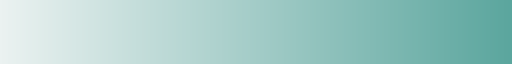

In [13]:
sns.light_palette('#5BA69E', input='rgb', as_cmap=True)

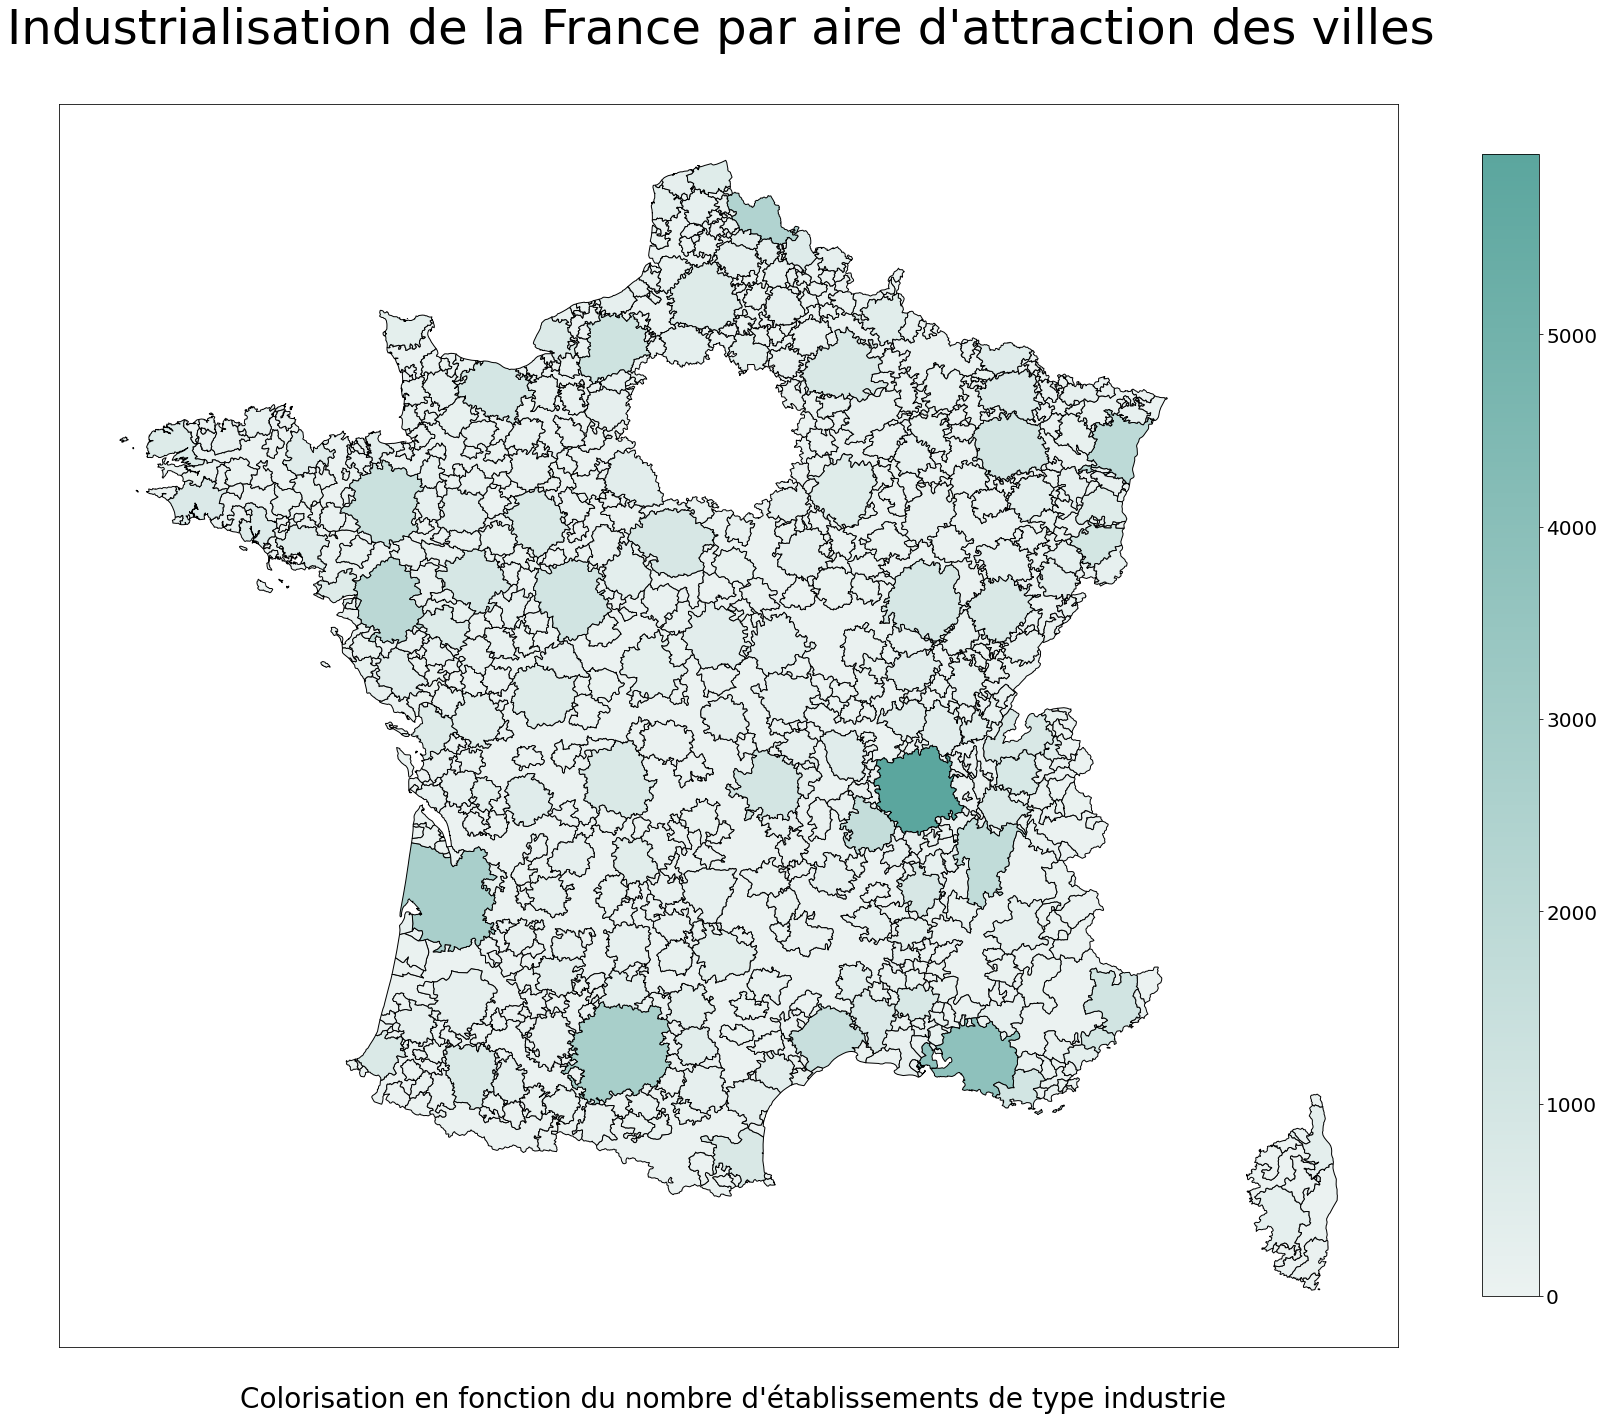

In [61]:
fig, ax = plt.subplots(figsize=(30,30))
gdf_ets_aav_no_paris.plot( 
                ax=ax,
                column="ets_industrie",
                edgecolor='black',
                cmap=sns.light_palette('#5BA69E', input='rgb', as_cmap=True),
                legend=True,
                legend_kwds={'shrink': 0.7}
               )
plt.title('Industrialisation de la France par aire d\'attraction des villes \n', fontsize=48, fontname='sans-serif')
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.xlabel("\n Colorisation en fonction du nombre d'établissements de type industrie", fontsize=28, fontname='sans-serif')
jauge = fig.axes[1]
jauge.tick_params(labelsize=20)
plt.show()

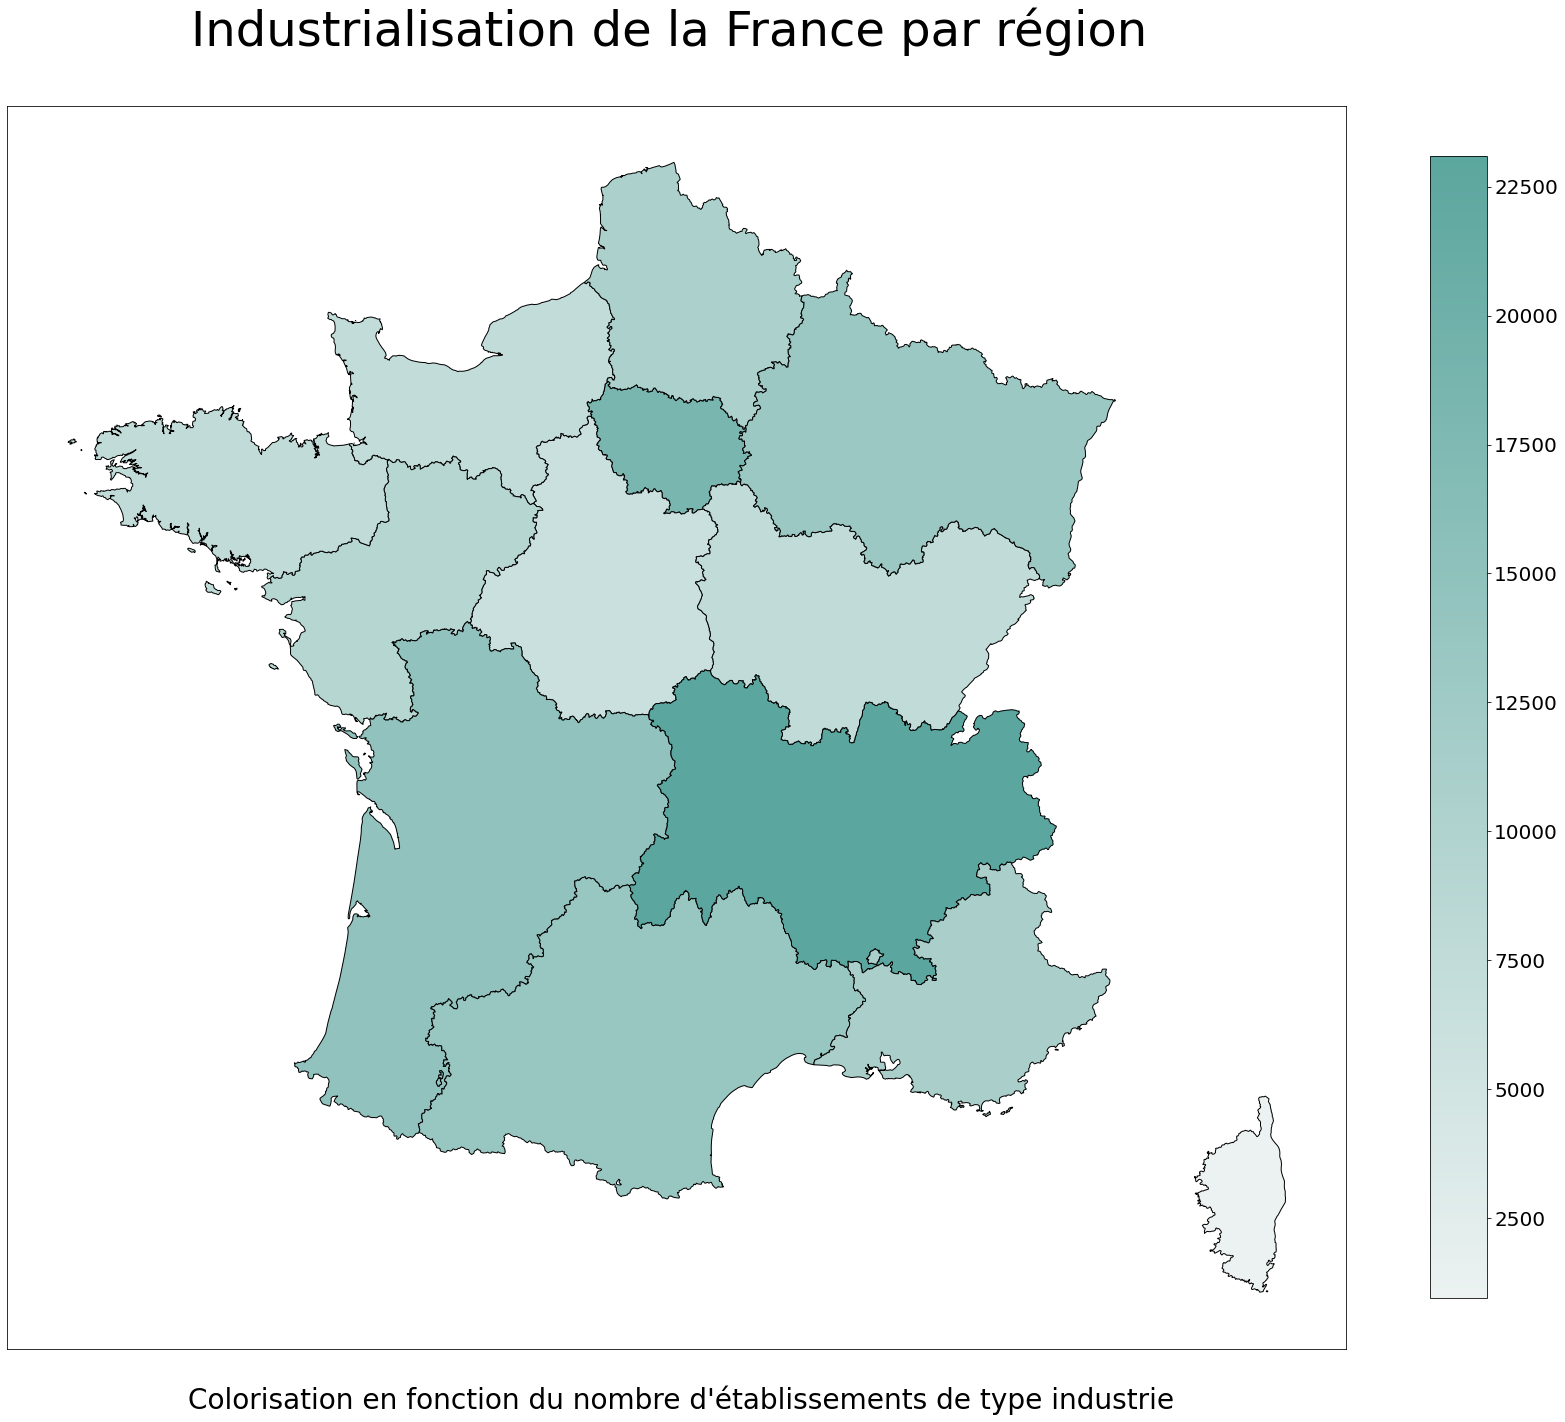

In [60]:
fig, ax = plt.subplots(figsize=(30,30))
gdf_ets_reg.plot( 
                ax=ax,
                column="ets_industrie",
                edgecolor='black',
                cmap=sns.light_palette('#5BA69E', input='rgb', as_cmap=True),
                legend=True,
                legend_kwds={'shrink': 0.7}
               )
plt.title('Industrialisation de la France par région \n', fontsize=48, fontname='sans-serif')
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.xlabel("\n Colorisation en fonction du nombre d'établissements de type industrie", fontsize=28, fontname='sans-serif')
jauge = fig.axes[1]
jauge.tick_params(labelsize=20)
plt.show()

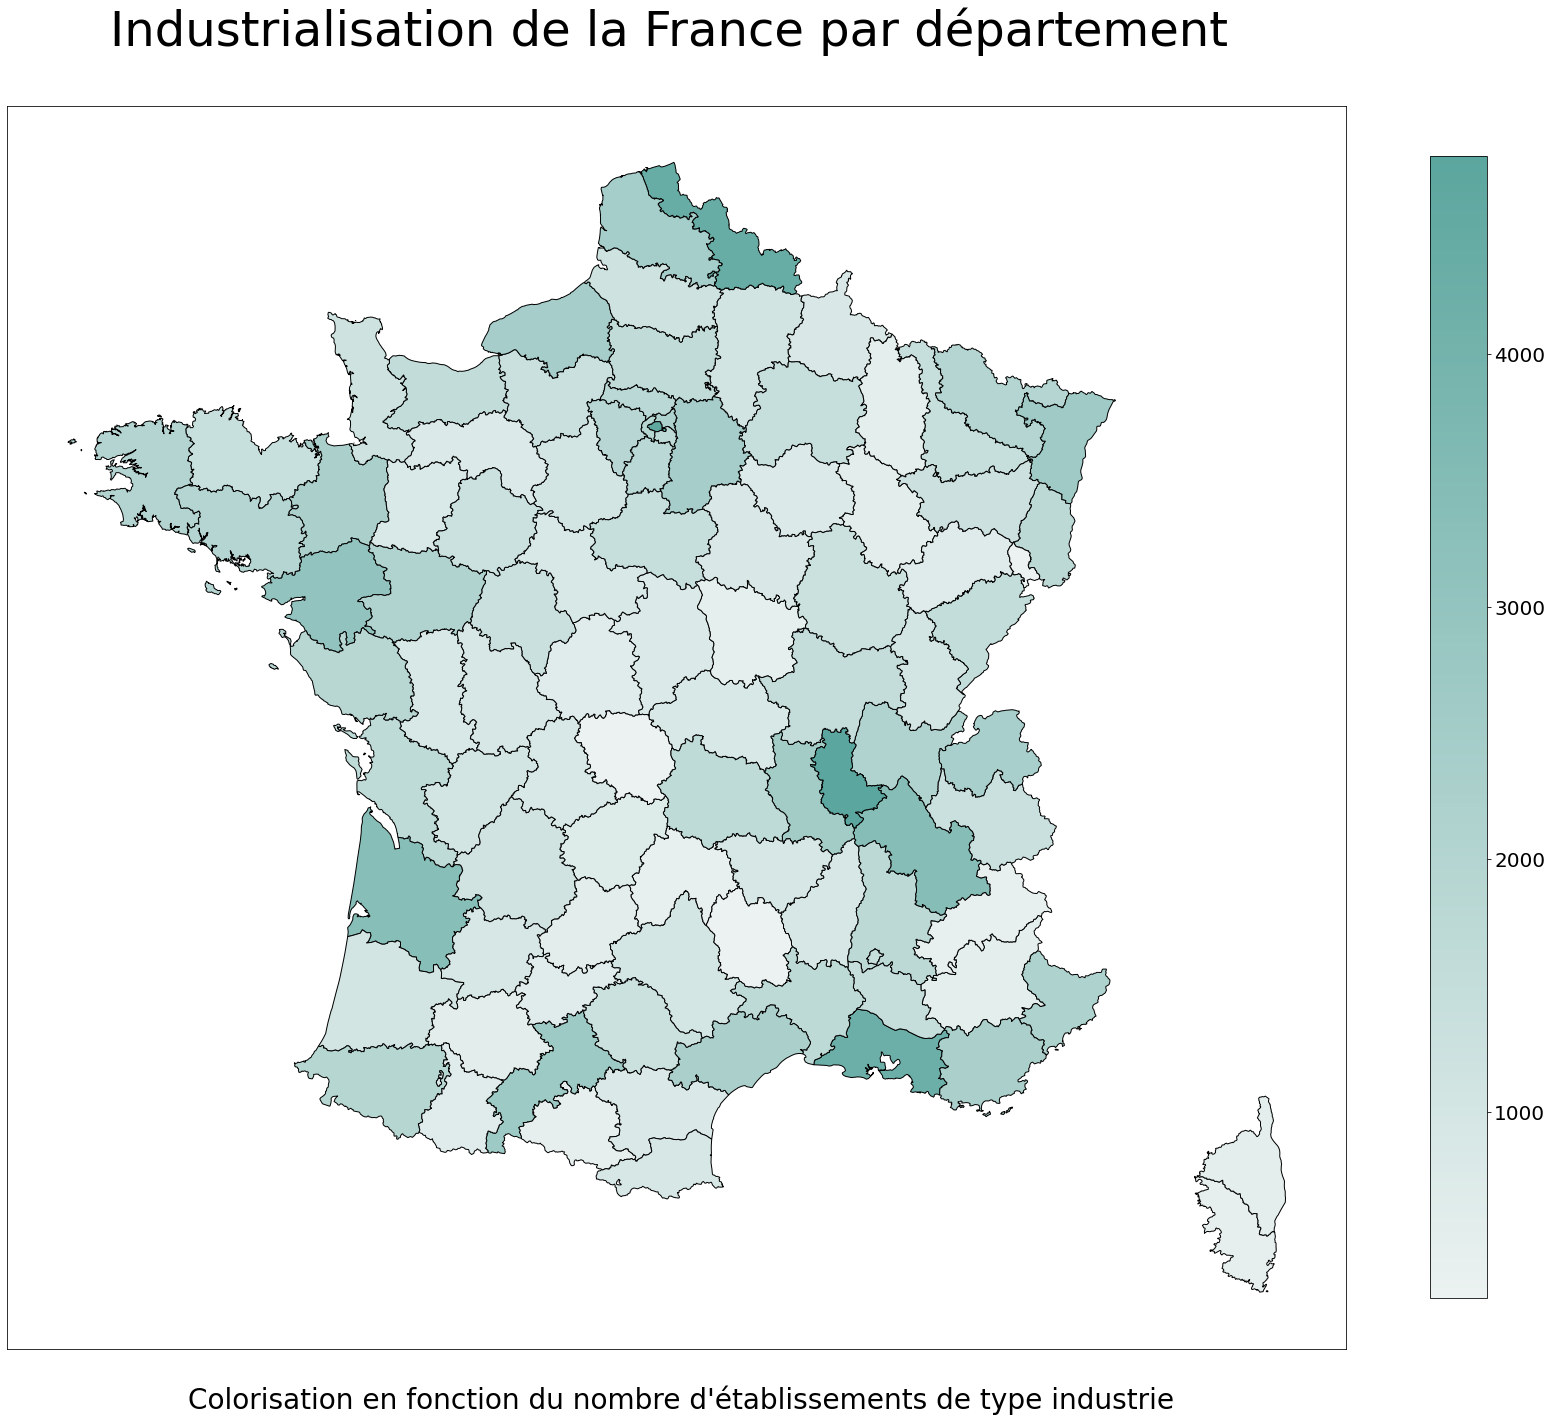

In [59]:
fig, ax = plt.subplots(figsize=(30,30))
gdf_ets_dep.plot( 
                ax=ax,
                column="ets_industrie",
                edgecolor='black',
                cmap=sns.light_palette('#5BA69E', input='rgb', as_cmap=True),
                legend=True,
                legend_kwds={'shrink': 0.7}
               )
plt.title('Industrialisation de la France par département \n', fontsize=48, fontname='sans-serif')
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.xlabel("\n Colorisation en fonction du nombre d'établissements de type industrie", fontsize=28, fontname='sans-serif')
jauge = fig.axes[1]
jauge.tick_params(labelsize=20)
plt.show()